# **DIPLOMATURA 2022**

# EXPLORACIÓN Y CURACIÓN DE DATOS

## Entregable # 2 Parte 1

## GRUPO Nº24

## INTEGRANTES:
   - Diana Fonnegra
   - Clarisa Manzone
   - Nico Rosales
   - Daniel Rubio

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

import seaborn
seaborn.set_context('talk')

from sqlalchemy import create_engine, text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Ejercicio 1 SQL:

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  

## Resolución:

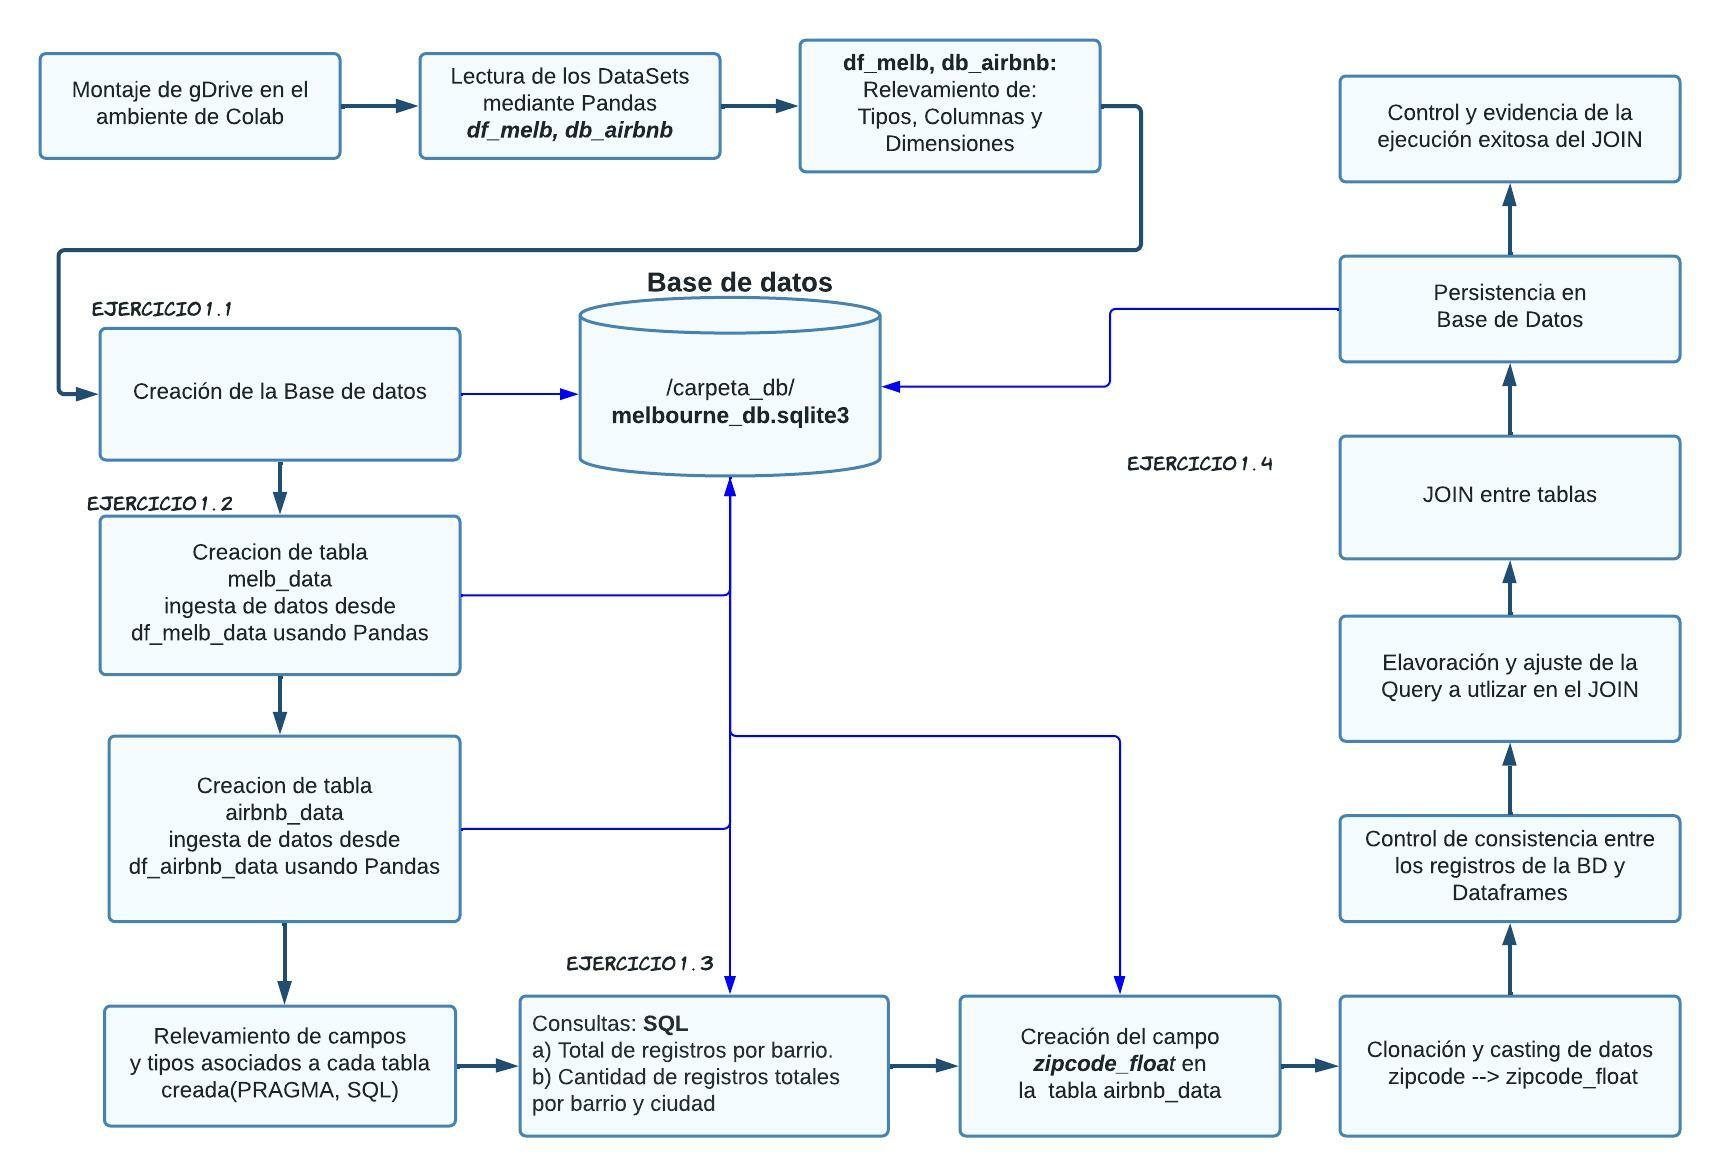

### Lectura del dataset con los datos de las viviendas de Melbourne, tomados de la compentencia Kaggle sobre estimación de precios de ventas de propiedades en Melbourne, Australia. Procedemos a su lectura y carga en el dataframe "df_melb".

#### *Nota:* El sitio https://sqliteviewer.flowsoft7.com/ ofrece un entorno GUI para cargar una base sqlite, visualizar datos y ejecutar consultas. Es sumamente util para insepeccionar la información almacenada y depurar senstencias sql.

In [ ]:
url_melb = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv'
df_melb = pd.read_csv(url_melb)

In [ ]:
#df_melb: Relevamiento de tipos, columnas y dimensiones.
print(df_melb.dtypes)
df_melb.shape

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object


(13580, 21)

### Lectura del dataset Airbnb. El dataframe "df_airbnb" continene la información con las columnas de interes vistas en clases.

In [ ]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
df_airbnb = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#df_airbnb: Relevamiento de tipos, columnas y dimensiones
print(df_airbnb.dtypes)
df_airbnb.shape

description               object
neighborhood_overview     object
street                    object
neighborhood              object
city                      object
suburb                    object
state                     object
zipcode                   object
latitude                 float64
longitude                float64
price                      int64
weekly_price             float64
monthly_price            float64
dtype: object


(22895, 13)

## 1.1 Creamos la base de datos "melboure_db" en SQLite utilizando la libreria SQLalchemy. La misma esta alocada en gdrive.

In [ ]:
engine = create_engine("sqlite:////content/drive/MyDrive/carpeta_db/melbourne_db.sqlite3", echo=True)
# echo=True setea la visualización a modo de log de comandos y acciones durante la ejecunción de una sentencia sql

## 1.2 Creación de tablas e incorporación de datos

Ingestamos en la tabla "melb_data" los datos del correspondiente dataframe.

In [ ]:
df_melb.to_sql('melb_data', con=engine, if_exists="replace")

2022-06-01 03:37:23,279 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2022-06-01 03:37:23,283 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:23,294 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2022-06-01 03:37:23,295 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:23,309 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-01 03:37:23,313 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:23,317 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2022-06-01 03:37:23,322 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:23,333 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-01 03:37:23,336 INFO sqlalchemy.engine.Engine [raw sql] ('melb_data',)
2022-06-01 03:37:23,340 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("m

Ingestamos en la tabla "airbnb_data" los datos del correspondiente dataframe.

In [ ]:
df_airbnb.to_sql('airbnb_data', con=engine, if_exists="replace")

2022-06-01 03:37:24,636 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_data")
2022-06-01 03:37:24,639 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:24,659 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_data")
2022-06-01 03:37:24,661 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:24,677 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-01 03:37:24,678 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:24,687 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_data")
2022-06-01 03:37:24,690 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:24,702 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-01 03:37:24,704 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb_data',)
2022-06-01 03:37:24,712 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key

Relevamos los campos de cada tabla a fin de idenfiticar su composición y los tipos de datos aplicados por Pandas al ingestar los datos en la base de datos

In [ ]:
# Consultamos los campos de la tabla "melb_data"
# La siguiente sentencia, con el nombre de la tabla entre corchetes, devuelve
# atributos de interes tales como el nombre de los campos y tipos, entre otros.

query_campos_melb="PRAGMA table_info([melb_data])"
with engine.connect() as con:
      rs = con.execute(query_campos_melb)
      print("Los campos de la tabla melb_data son:")
      for row in rs:
          print(row)
      print('\n\n')

2022-06-01 03:37:37,876 INFO sqlalchemy.engine.Engine PRAGMA table_info([melb_data])
2022-06-01 03:37:37,880 INFO sqlalchemy.engine.Engine [raw sql] ()
Los campos de la tabla melb_data son:
(0, 'index', 'BIGINT', 0, None, 0)
(1, 'Suburb', 'TEXT', 0, None, 0)
(2, 'Address', 'TEXT', 0, None, 0)
(3, 'Rooms', 'BIGINT', 0, None, 0)
(4, 'Type', 'TEXT', 0, None, 0)
(5, 'Price', 'FLOAT', 0, None, 0)
(6, 'Method', 'TEXT', 0, None, 0)
(7, 'SellerG', 'TEXT', 0, None, 0)
(8, 'Date', 'TEXT', 0, None, 0)
(9, 'Distance', 'FLOAT', 0, None, 0)
(10, 'Postcode', 'FLOAT', 0, None, 0)
(11, 'Bedroom2', 'FLOAT', 0, None, 0)
(12, 'Bathroom', 'FLOAT', 0, None, 0)
(13, 'Car', 'FLOAT', 0, None, 0)
(14, 'Landsize', 'FLOAT', 0, None, 0)
(15, 'BuildingArea', 'FLOAT', 0, None, 0)
(16, 'YearBuilt', 'FLOAT', 0, None, 0)
(17, 'CouncilArea', 'TEXT', 0, None, 0)
(18, 'Lattitude', 'FLOAT', 0, None, 0)
(19, 'Longtitude', 'FLOAT', 0, None, 0)
(20, 'Regionname', 'TEXT', 0, None, 0)
(21, 'Propertycount', 'FLOAT', 0, None, 0)


In [ ]:
query_campos_airbnb="PRAGMA table_info([airbnb_data])"
with engine.connect() as con:
      rs = con.execute(query_campos_airbnb)
      print("Los campos de la tabla airbnb_data son:")
      for row in rs:
          print(row)
      print('\n\n')

2022-06-01 03:37:37,918 INFO sqlalchemy.engine.Engine PRAGMA table_info([airbnb_data])
2022-06-01 03:37:37,924 INFO sqlalchemy.engine.Engine [raw sql] ()
Los campos de la tabla airbnb_data son:
(0, 'index', 'BIGINT', 0, None, 0)
(1, 'description', 'TEXT', 0, None, 0)
(2, 'neighborhood_overview', 'TEXT', 0, None, 0)
(3, 'street', 'TEXT', 0, None, 0)
(4, 'neighborhood', 'TEXT', 0, None, 0)
(5, 'city', 'TEXT', 0, None, 0)
(6, 'suburb', 'TEXT', 0, None, 0)
(7, 'state', 'TEXT', 0, None, 0)
(8, 'zipcode', 'TEXT', 0, None, 0)
(9, 'latitude', 'FLOAT', 0, None, 0)
(10, 'longitude', 'FLOAT', 0, None, 0)
(11, 'price', 'BIGINT', 0, None, 0)
(12, 'weekly_price', 'FLOAT', 0, None, 0)
(13, 'monthly_price', 'FLOAT', 0, None, 0)





## 1.3 Consultas

### 1.3.a Tabla melb_data. Total de registros por barrio.

In [ ]:
# Cantidad de registros totales por barrio de la tabla melb_data:
query_a = """
  SELECT Suburb, COUNT(1) as Total_records_Suburb
  FROM melb_data
  GROUP BY Suburb
  ORDER BY Total_records_Suburb DESC"""

In [ ]:
with engine.connect() as con:
      rs = con.execute(query_a)
      for row in rs:
          print(row)

2022-06-01 03:37:37,950 INFO sqlalchemy.engine.Engine 
  SELECT Suburb, COUNT(1) as Total_records_Suburb 
  FROM melb_data 
  GROUP BY Suburb 
  ORDER BY Total_records_Suburb DESC
2022-06-01 03:37:37,951 INFO sqlalchemy.engine.Engine [raw sql] ()
('Reservoir', 359)
('Richmond', 260)
('Bentleigh East', 249)
('Preston', 239)
('Brunswick', 222)
('Essendon', 220)
('South Yarra', 202)
('Glen Iris', 195)
('Hawthorn', 191)
('Coburg', 190)
('Northcote', 188)
('Brighton', 186)
('Kew', 177)
('Balwyn North', 171)
('Pascoe Vale', 171)
('Yarraville', 164)
('St Kilda', 162)
('Glenroy', 159)
('Port Melbourne', 153)
('Moonee Ponds', 149)
('Carnegie', 146)
('Bentleigh', 139)
('Thornbury', 139)
('Brighton East', 138)
('Newport', 137)
('Camberwell', 132)
('Footscray', 132)
('Elwood', 131)
('Ascot Vale', 130)
('Hampton', 130)
('Surrey Hills', 125)
('Prahran', 123)
('Keilor East', 121)
('Hawthorn East', 119)
('Kensington', 117)
('Malvern East', 117)
('Doncaster', 116)
('Sunshine', 111)
('Brunswick West', 1

### 1.3.b Tabla melb_data. Cantidad de registros totales por barrio y ciudad

In [ ]:
# Cantidad de registros totales por barrio y ciudad
query_b = """
  SELECT Suburb, CouncilArea, COUNT(1) as Total_records_Suburb
  FROM melb_data
  GROUP BY Suburb, CouncilArea
  ORDER BY Total_records_Suburb DESC"""

In [ ]:
with engine.connect() as con:
      rs = con.execute(query_b)
      for row in rs:
          print(row)


2022-06-01 03:37:38,164 INFO sqlalchemy.engine.Engine 
  SELECT Suburb, CouncilArea, COUNT(1) as Total_records_Suburb 
  FROM melb_data 
  GROUP BY Suburb, CouncilArea 
  ORDER BY Total_records_Suburb DESC
2022-06-01 03:37:38,166 INFO sqlalchemy.engine.Engine [raw sql] ()
('Reservoir', 'Darebin', 323)
('Richmond', 'Yarra', 251)
('Bentleigh East', 'Glen Eira', 234)
('Preston', 'Darebin', 228)
('Brunswick', 'Moreland', 208)
('Essendon', 'Moonee Valley', 208)
('Hawthorn', 'Boroondara', 186)
('Brighton', 'Bayside', 176)
('Coburg', 'Moreland', 176)
('Northcote', 'Darebin', 175)
('Pascoe Vale', 'Moreland', 161)
('St Kilda', 'Port Phillip', 160)
('Kew', 'Boroondara', 157)
('South Yarra', 'Stonnington', 157)
('Yarraville', 'Maribyrnong', 154)
('Balwyn North', 'Boroondara', 151)
('Glenroy', 'Moreland', 144)
('Moonee Ponds', 'Moonee Valley', 139)
('Carnegie', 'Glen Eira', 138)
('Thornbury', 'Darebin', 132)
('Bentleigh', 'Glen Eira', 131)
('Newport', 'Hobsons Bay', 129)
('Footscray', 'Maribyrnong

###1.3.b.2 Tabla airbnb_data. Cantidad de registros totales por barrio y ciudad

In [ ]:
query_b_2 = """
  SELECT city, suburb, COUNT(1) as Total_records_Suburb
  FROM airbnb_data
  GROUP BY city, suburb
  ORDER BY Total_records_Suburb DESC"""

In [ ]:
with engine.connect() as con:
      rs = con.execute(query_b_2)
      for row in rs:
          print(row)

2022-06-01 03:37:38,607 INFO sqlalchemy.engine.Engine 
  SELECT city, suburb, COUNT(1) as Total_records_Suburb 
  FROM airbnb_data 
  GROUP BY city, suburb
  ORDER BY Total_records_Suburb DESC
2022-06-01 03:37:38,617 INFO sqlalchemy.engine.Engine [raw sql] ()
('Melbourne', 'Melbourne', 3850)
('Melbourne', 'Southbank', 1190)
('Port Phillip', 'Saint Kilda', 802)
('Stonnington', 'South Yarra', 790)
('Melbourne', 'Docklands', 612)
('Yarra', 'Richmond', 570)
('Melbourne', 'Carlton', 531)
('Moreland', 'Brunswick', 434)
('Yarra', 'Fitzroy', 375)
('Melbourne', 'North Melbourne', 340)
('Port Phillip', 'Melbourne', 330)
('Port Phillip', 'Elwood', 325)
('Yarra', 'Collingwood', 295)
('Darebin', 'Northcote', 279)
('Port Phillip', 'South Melbourne', 278)
('Melbourne', 'West Melbourne', 263)
('Stonnington', 'Prahran', 261)
('Yarra', 'Abbotsford', 257)
('Port Phillip', 'Port Melbourne', 256)
('Yarra', 'Fitzroy North', 229)
('Port Phillip', 'St Kilda', 196)
('Wyndham', 'Point Cook', 191)
('Melbourne', 

## 1.4 Combinación de los datasets de ambas tablas utilizando el comando JOIN de SQL.

#### Creamos el "campo zipcode_float" para almacenar el codigo postal en formato float

In [ ]:
# Obtenemos una lista con los campos que componen la tabla "airbnb_data"
lista_campos_melb=pd.read_sql("PRAGMA table_info(airbnb_data)", engine)["name"].to_list()
print(lista_campos_melb)

# Si el campo no esta creado, procedemos a crearlo
if 'zipcode_float' not in lista_campos_melb:
  # El siguiente comando sql crea el campo y define su tipo
  engine.execute("ALTER TABLE airbnb_data ADD COLUMN zipcode_float 'float'")

2022-06-01 03:37:39,296 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("PRAGMA table_info(airbnb_data)")
2022-06-01 03:37:39,301 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:39,304 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("PRAGMA table_info(airbnb_data)")
2022-06-01 03:37:39,306 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:39,315 INFO sqlalchemy.engine.Engine PRAGMA table_info(airbnb_data)
2022-06-01 03:37:39,317 INFO sqlalchemy.engine.Engine [raw sql] ()
['index', 'description', 'neighborhood_overview', 'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price', 'weekly_price', 'monthly_price']
2022-06-01 03:37:39,327 INFO sqlalchemy.engine.Engine ALTER TABLE airbnb_data ADD COLUMN zipcode_float 'float'
2022-06-01 03:37:39,330 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:39,353 INFO sqlalchemy.engine.Engine COMMIT


#### Ingestamos "zipcode_float" aplicando el CAST a float del campo "zipcode"


In [ ]:
# El siguiente comando sql copia toda la columna zipcode en la columna
# zipcodefloat realizado la conversión de tipo.

engine.execute("""
UPDATE airbnb_data
SET zipcode_float = CAST(zipcode AS FLOAT)""")

2022-06-01 03:37:39,379 INFO sqlalchemy.engine.Engine 
UPDATE airbnb_data 
SET zipcode_float = CAST(zipcode AS FLOAT)
2022-06-01 03:37:39,390 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:43,519 INFO sqlalchemy.engine.Engine COMMIT


In [ ]:
# Relevamiento e idenficación de codigos postales en la tabla airbnb
# luego del curado (cast de tipos) realizado en la información de zipcode.

query_c = """
  SELECT zipcode_float, COUNT(zipcode_float) as cantidad
  FROM airbnb_data
  GROUP BY zipcode_float
  ORDER BY cantidad desc LIMIT 10"""

with engine.connect() as con:
      rs = con.execute(query_c)
      for row in rs:
          print(row)

2022-06-01 03:37:43,611 INFO sqlalchemy.engine.Engine 
  SELECT zipcode_float, COUNT(zipcode_float) as cantidad 
  FROM airbnb_data 
  GROUP BY zipcode_float 
  ORDER BY cantidad desc LIMIT 10
2022-06-01 03:37:43,613 INFO sqlalchemy.engine.Engine [raw sql] ()
(3000.0, 3368)
(3006.0, 1268)
(3182.0, 1135)
(3141.0, 881)
(3004.0, 728)
(3121.0, 628)
(3008.0, 616)
(3053.0, 538)
(3181.0, 460)
(3056.0, 446)


#### Valores únicos en la tabla "melb_data"

In [ ]:
query_melb_data_unicos = """
SELECT COUNT(*)
FROM (SELECT DISTINCT Postcode
      FROM melb_data
      )
"""
with engine.connect() as con:
  rs = con.execute(query_melb_data_unicos)
  for row in rs:
    print("Los codigos postales unicos en melb_data son:", row[0])

2022-06-01 03:37:43,779 INFO sqlalchemy.engine.Engine 
SELECT COUNT(*)
FROM (SELECT DISTINCT Postcode
      FROM melb_data
      )

2022-06-01 03:37:43,783 INFO sqlalchemy.engine.Engine [raw sql] ()
Los codigos postales unicos en melb_data son: 198


#### Valores únicos en la tabla "airbnb_data"

In [ ]:
query_airbnb_data_unicos = """
SELECT COUNT(*)
FROM (SELECT DISTINCT zipcode_float
      FROM airbnb_data
      )
"""
with engine.connect() as con:
  rs = con.execute(query_airbnb_data_unicos)
  for row in rs:
    print("Los codigos postales unicos en airbnb_data son:", row[0])

2022-06-01 03:37:43,873 INFO sqlalchemy.engine.Engine 
SELECT COUNT(*)
FROM (SELECT DISTINCT zipcode_float
      FROM airbnb_data
      )

2022-06-01 03:37:43,879 INFO sqlalchemy.engine.Engine [raw sql] ()
Los codigos postales unicos en airbnb_data son: 249


#### Valores en común a ambos set de datos

In [ ]:
query_comunes = """
SELECT COUNT(*)
FROM (SELECT DISTINCT zipcode_float
      FROM airbnb_data
      INNER JOIN
              (SELECT DISTINCT Postcode
               FROM melb_data)
      ON zipcode_float=Postcode)
"""
with engine.connect() as con:
  rs = con.execute(query_comunes)
  for row in rs:
    print("Los codigos postales comunes a ambos set de datos son:", row[0])

2022-06-01 03:37:44,010 INFO sqlalchemy.engine.Engine 
SELECT COUNT(*)
FROM (SELECT DISTINCT zipcode_float
      FROM airbnb_data
      INNER JOIN
              (SELECT DISTINCT Postcode
               FROM melb_data) 
      ON zipcode_float=Postcode)

2022-06-01 03:37:44,013 INFO sqlalchemy.engine.Engine [raw sql] ()
Los codigos postales comunes a ambos set de datos son: 191


#### Definicion y ajuste de la query con información relevantes presentes en el dataset de airbnb previo a realizar el JOIN.

In [ ]:
query_avg = """
    SELECT
        zipcode_float as zip,
        AVG(monthly_price) as monthly_price_mean,
        AVG(weekly_price) as weekly_price_mean,
        AVG(price) as price_mean,
        COUNT(zipcode_float) as cantidad
    FROM airbnb_data
    WHERE zip IS NOT NULL
    GROUP BY zip
    ORDER BY cantidad DESC
    LIMIT 5
"""
with engine.connect() as con:
      rs_avg = con.execute(query_avg)
      for row in rs_avg:
          print(row)

2022-06-01 03:37:44,228 INFO sqlalchemy.engine.Engine 
    SELECT 
        zipcode_float as zip,  
        AVG(monthly_price) as monthly_price_mean,
        AVG(weekly_price) as weekly_price_mean, 
        AVG(price) as price_mean, 
        COUNT(zipcode_float) as cantidad        
    FROM airbnb_data
    WHERE zip IS NOT NULL
    GROUP BY zip
    ORDER BY cantidad DESC
    LIMIT 5

2022-06-01 03:37:44,230 INFO sqlalchemy.engine.Engine [raw sql] ()
(3000.0, 3407.204651162791, 918.7389558232932, 150.47001187648456, 3368)
(3006.0, 4358.556701030928, 1239.8272727272727, 188.85173501577287, 1268)
(3182.0, 3847.4, 1051.4410256410256, 147.7295154185022, 1135)
(3141.0, 3417.811111111111, 1040.4036697247707, 157.91259931895573, 881)
(3004.0, 3759.925925925926, 1061.1714285714286, 158.27197802197801, 728)


#### Implementación del JOIN entre la tabla melb_data y los datos relevantes de precios de airbnb asociados por codigo postal.


In [ ]:
query_join = """
SELECT *
FROM melb_data
LEFT JOIN (
          SELECT
              zipcode_float as zip,
              AVG(monthly_price) as monthly_price_mean,
              AVG(weekly_price) as weekly_price_mean,
              AVG(price) as price_mean,
              COUNT(zipcode_float)
          FROM airbnb_data
          WHERE zip IS NOT NULL
          GROUP BY zip
          )
  ON melb_data.Postcode = zip
"""

with engine.connect() as con:
      rs = con.execute(query_join)
      for row in rs:
          print(row)


Se han truncado las últimas 5000 líneas del flujo de salida.
(8580, 'Balwyn', '27A Yerrin St', 3, 't', 1680000.0, 'S', 'Fletchers', '22/04/2017', 9.7, 3103.0, 3.0, 3.0, 1.0, 329.0, 178.0, 2005.0, 'Boroondara', -37.8101, 145.0844, 'Southern Metropolitan', 5682.0, 3103.0, 2111.25, 606.75, 105.26315789473684, 57)
(8581, 'Brooklyn', '6 Millers Rd', 2, 'h', 1005000.0, 'S', 'hockingstuart', '22/04/2017', 10.9, 3012.0, 2.0, 1.0, 2.0, 780.0, 156.0, 1950.0, 'Hobsons Bay', -37.8241, 144.8419, 'Western Metropolitan', 962.0, 3012.0, 2335.0, 518.0, 112.63157894736842, 76)
(8582, 'Carlton', '1/2 Drummond St', 3, 'u', 1520000.0, 'S', 'hockingstuart', '8/04/2017', 1.8, 3053.0, 3.0, 2.0, 2.0, 214.0, None, 1993.0, 'Melbourne', -37.8177, 144.8496, 'Northern Metropolitan', 6786.0, 3053.0, 3205.315789473684, 923.5102040816327, 111.76765799256506, 538)
(8583, 'Carlton', '2/100 Keppel St', 2, 't', 960000.0, 'VB', 'Nelson', '20/05/2017', 1.8, 3053.0, 2.0, 2.0, 1.0, 0.0, 90.0, 1860.0, 'Melbourne', -37.7947, 14

#### Disposición de los datos obtenidos en un dataframe. Repetimos la consulta con Pandas.

In [ ]:
df_melb_join_airbnb = pd.read_sql(query_join, engine)

2022-06-01 03:37:54,194 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("
SELECT * 
FROM melb_data
LEFT JOIN (
          SELECT 
              zipcode_float as zip,  
              AVG(monthly_price) as monthly_price_mean,
              AVG(weekly_price) as weekly_price_mean, 
              AVG(price) as price_mean, 
              COUNT(zipcode_float)        
          FROM airbnb_data
          WHERE zip IS NOT NULL
          GROUP BY zip
          )
  ON melb_data.Postcode = zip
")
2022-06-01 03:37:54,198 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:54,203 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("
SELECT * 
FROM melb_data
LEFT JOIN (
          SELECT 
              zipcode_float as zip,  
              AVG(monthly_price) as monthly_price_mean,
              AVG(weekly_price) as weekly_price_mean, 
              AVG(price) as price_mean, 
              COUNT(zipcode_float)        
          FROM airbnb_data
          WHERE zip IS NOT NULL
          GRO

In [ ]:
# Relevamiento del resultado, presentado en el dataframe

print(f"El dataframe tiene {df_melb_join_airbnb.shape[0]} filas, \
{df_melb_join_airbnb.shape[1]} columnas")


El dataframe tiene 13580 filas, 27 columnas


#### Tenemos el resultado dispuesto en el dataframe, para darle persistencia, aplicamos el registro del mismo en la base de datos.

In [ ]:
df_melb_join_airbnb.to_sql('melb_join_airbnb_data', engine, if_exists='replace', index = False)


2022-06-01 03:37:56,106 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_join_airbnb_data")
2022-06-01 03:37:56,108 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:56,121 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_join_airbnb_data")
2022-06-01 03:37:56,123 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:56,134 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-01 03:37:56,136 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:56,145 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_join_airbnb_data")
2022-06-01 03:37:56,146 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-01 03:37:56,160 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-01 03:37:56,161 INFO sqlalchemy.engine.Engine [raw sql] ('melb_join_airbnb_data',)
2022-06-01 03:37:56,169 INFO sqlalche

###Evidencia

Corroboramos que se efectuó el JOIN y que se agregaron a la tabla melb_data las columnas de los precios promedios de la tabla airbnb_data

In [ ]:
query_campos_airbnb="PRAGMA table_info([melb_join_airbnb_data])"
with engine.connect() as con:
      rs = con.execute(query_campos_airbnb)
      print("Los campos de la tabla melb_join_airbnb_data son:")
      for row in rs:
          print(row)
      print('\n\n')

2022-06-01 03:37:57,630 INFO sqlalchemy.engine.Engine PRAGMA table_info([melb_join_airbnb_data])
2022-06-01 03:37:57,636 INFO sqlalchemy.engine.Engine [raw sql] ()
Los campos de la tabla melb_join_airbnb_data son:
(0, 'index', 'BIGINT', 0, None, 0)
(1, 'Suburb', 'TEXT', 0, None, 0)
(2, 'Address', 'TEXT', 0, None, 0)
(3, 'Rooms', 'BIGINT', 0, None, 0)
(4, 'Type', 'TEXT', 0, None, 0)
(5, 'Price', 'FLOAT', 0, None, 0)
(6, 'Method', 'TEXT', 0, None, 0)
(7, 'SellerG', 'TEXT', 0, None, 0)
(8, 'Date', 'TEXT', 0, None, 0)
(9, 'Distance', 'FLOAT', 0, None, 0)
(10, 'Postcode', 'FLOAT', 0, None, 0)
(11, 'Bedroom2', 'FLOAT', 0, None, 0)
(12, 'Bathroom', 'FLOAT', 0, None, 0)
(13, 'Car', 'FLOAT', 0, None, 0)
(14, 'Landsize', 'FLOAT', 0, None, 0)
(15, 'BuildingArea', 'FLOAT', 0, None, 0)
(16, 'YearBuilt', 'FLOAT', 0, None, 0)
(17, 'CouncilArea', 'TEXT', 0, None, 0)
(18, 'Lattitude', 'FLOAT', 0, None, 0)
(19, 'Longtitude', 'FLOAT', 0, None, 0)
(20, 'Regionname', 'TEXT', 0, None, 0)
(21, 'Propertycount

###Como se puede ver, se agregaron al final las columnas deseadas
###Ahora vemos si los valores se agregaron correctamente al código postal correspondiente.
Para esto, primero necesitamos ver algún código postal que pertenezca a la unión, ver el promedio de los precios y luego corroborar que en la unión aparezcan los mismos.

In [ ]:
query_common_zipcode = """
SELECT DISTINCT zipcode_float
FROM airbnb_data
INNER JOIN
      (SELECT DISTINCT Postcode
      FROM melb_data)
      ON zipcode_float=Postcode
"""
with engine.connect() as con:
      rs = con.execute(query_common_zipcode)
      print("Los códigos postales que coinciden en las tablas son:")
      for row in rs:
          print(row)
      print('\n\n')

2022-06-01 03:37:57,685 INFO sqlalchemy.engine.Engine 
SELECT DISTINCT zipcode_float
FROM airbnb_data
INNER JOIN
      (SELECT DISTINCT Postcode
      FROM melb_data) 
      ON zipcode_float=Postcode

2022-06-01 03:37:57,692 INFO sqlalchemy.engine.Engine [raw sql] ()
Los códigos postales que coinciden en las tablas son:
(3105.0,)
(3057.0,)
(3182.0,)
(3071.0,)
(3183.0,)
(3806.0,)
(3073.0,)
(3002.0,)
(3166.0,)
(3199.0,)
(3121.0,)
(3000.0,)
(3187.0,)
(3101.0,)
(3065.0,)
(3188.0,)
(3068.0,)
(3195.0,)
(3070.0,)
(3207.0,)
(3205.0,)
(3181.0,)
(3135.0,)
(3052.0,)
(3013.0,)
(3777.0,)
(3079.0,)
(3184.0,)
(3149.0,)
(3206.0,)
(3123.0,)
(3053.0,)
(3161.0,)
(3094.0,)
(3056.0,)
(3046.0,)
(3051.0,)
(3066.0,)
(3006.0,)
(3141.0,)
(3130.0,)
(3023.0,)
(3162.0,)
(3030.0,)
(3167.0,)
(3186.0,)
(3067.0,)
(3015.0,)
(3143.0,)
(3103.0,)
(3910.0,)
(3029.0,)
(3084.0,)
(3185.0,)
(3144.0,)
(3145.0,)
(3031.0,)
(3104.0,)
(3012.0,)
(3072.0,)
(3191.0,)
(3058.0,)
(3074.0,)
(3775.0,)
(3163.0,)
(3147.0,)
(3175.0,)
(3099.0,

###Con los códigos postales identificados, seleccionamos uno sin ninguna particularidad y vemos sus valos. En este caso seleccionamos el c.p. 3000

In [ ]:
query_avg_3000 = """
    SELECT
        zipcode_float as zip,
        AVG(monthly_price) as monthly_price_mean,
        AVG(weekly_price) as weekly_price_mean,
        AVG(price) as price_mean,
        COUNT(zipcode_float) as cantidad
    FROM airbnb_data
    WHERE zip IS NOT NULL and zip = 3000.0
    GROUP BY zip
"""
query_data_zip_3000 = """
SELECT  Suburb, Price, zip, monthly_price_mean, weekly_price_mean, price_mean
FROM melb_join_airbnb_data
WHERE zip = 3000.0
"""

with engine.connect() as con:
      rs = con.execute(query_avg_3000)
      print("Los promedios diario, semanal y mensual del código postal 3000.0 son:")
      for row in rs:
          print(row)
      print('\n\n')
      rs = con.execute(query_data_zip_3000)
      print("Los datos del código postal 3000.0 son:")
      for row in rs:
          print(row)
      print('\n\n')

2022-06-01 03:37:58,087 INFO sqlalchemy.engine.Engine 
    SELECT 
        zipcode_float as zip,  
        AVG(monthly_price) as monthly_price_mean,
        AVG(weekly_price) as weekly_price_mean, 
        AVG(price) as price_mean, 
        COUNT(zipcode_float) as cantidad        
    FROM airbnb_data
    WHERE zip IS NOT NULL and zip = 3000.0
    GROUP BY zip

2022-06-01 03:37:58,089 INFO sqlalchemy.engine.Engine [raw sql] ()
Los promedios diario, semanal y mensual del código postal 3000.0 son:
(3000.0, 3407.204651162791, 918.7389558232932, 150.47001187648456, 3368)



2022-06-01 03:37:58,184 INFO sqlalchemy.engine.Engine 
SELECT  Suburb, Price, zip, monthly_price_mean, weekly_price_mean, price_mean
FROM melb_join_airbnb_data
WHERE zip = 3000.0

2022-06-01 03:37:58,186 INFO sqlalchemy.engine.Engine [raw sql] ()
Los datos del código postal 3000.0 son:
('Melbourne', 427000.0, 3000.0, 3407.204651162791, 918.7389558232932, 150.47001187648456)
('Melbourne', 1160500.0, 3000.0, 3407.20465116

####Podemos ver que se agregaron los valores correspondientes. Ahora veamos con un valor que no pertenezca a la unión.
Para esto, chequeamos los valores de c.p. que no coinciden en ambas tablas

In [ ]:
query_data_zip_diff = """
SELECT DISTINCT Postcode
FROM melb_data
WHERE Postcode NOT IN (
      SELECT DISTINCT zipcode_float
      FROM airbnb_data
      INNER JOIN
      (SELECT DISTINCT Postcode
      FROM melb_data)
      ON zipcode_float=Postcode
                        )
"""
with engine.connect() as con:
      rs = con.execute(query_data_zip_diff)
      print("Los código postal que no coinciden en las tablas son:")
      for row in rs:
          print(row)
      print('\n\n')

2022-06-01 04:03:08,496 INFO sqlalchemy.engine.Engine 
SELECT DISTINCT Postcode
FROM melb_data
WHERE Postcode NOT IN (
      SELECT DISTINCT zipcode_float
      FROM airbnb_data
      INNER JOIN
      (SELECT DISTINCT Postcode
      FROM melb_data) 
      ON zipcode_float=Postcode

)

2022-06-01 04:03:08,499 INFO sqlalchemy.engine.Engine [raw sql] ()
Los código postal que no coinciden en las tablas son:
(3061.0,)
(3437.0,)
(3431.0,)
(3340.0,)
(3022.0,)
(3756.0,)
(3438.0,)





####Elegimos al azar un c.p. como 3340.0 y vemos que no cuenta con ningún valor en las columnas de precios promedios.

In [ ]:
query_data_zip_3340 = """
SELECT  Suburb, Price, zip, monthly_price_mean, weekly_price_mean, price_mean
FROM melb_join_airbnb_data
WHERE Postcode = 3340.0
"""
with engine.connect() as con:
      rs = con.execute(query_data_zip_3340)
      print("Los datos del código postal 3340.0 son:")
      for row in rs:
          print(row)
      print('\n\n')

2022-06-01 04:03:38,629 INFO sqlalchemy.engine.Engine 
SELECT  Suburb, Price, zip, monthly_price_mean, weekly_price_mean, price_mean
FROM melb_join_airbnb_data
WHERE Postcode = 3340.0

2022-06-01 04:03:38,642 INFO sqlalchemy.engine.Engine [raw sql] ()
Los datos del código postal 3340.0 son:
('Bacchus Marsh', 285000.0, None, None, None, None)



